In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print("Feature names : ",iris_data.feature_names)
print("Data[0] : ",iris_data.data[0])
print("Target names : ",iris_data.target_names)
print("Target[0] : ",iris_data.target[0])
print("Total number of examples : ",iris_data.data.shape[0])

Feature names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data[0] :  [5.1 3.5 1.4 0.2]
Target names :  ['setosa' 'versicolor' 'virginica']
Target[0] :  0
Total number of examples :  150


In [2]:
import pandas as pd
data = pd.DataFrame(iris_data.data , columns=iris_data.feature_names)
data['target'] = iris_data.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
y = data['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

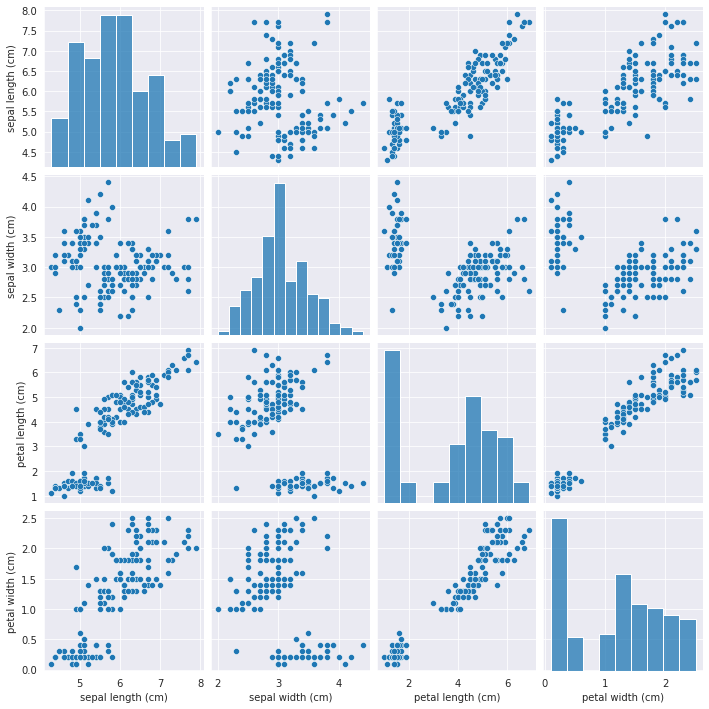

In [5]:
sns.pairplot(data.drop('target',axis=1))

In [6]:
from sklearn.tree import  DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('target' , axis=1), data['target'], test_size=0.25, random_state=100)

In [8]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (112, 4)
Shape of X_test  :  (38, 4)
Shape of y_train :  (112,)
Shape of y_test  :  (38,)


In [9]:
# Fit the Classifier on train data
clf.fit(X_train , y_train)
#Prediction for train data
print("Prediction for train data :->")
print("Original label : ",y_train[:5].values)
print("Prdicted label : ",clf.predict(X_train[:5]))
print('---------------------------------')
#Prediction for train data
print("Prediction for test data :->")
print("Original label : ",y_test[:5].values)
print("Prdicted label : ",clf.predict(X_test[:5]))

Prediction for train data :->
Original label :  [2 2 0 1 2]
Prdicted label :  [2 2 0 1 2]
---------------------------------
Prediction for test data :->
Original label :  [2 0 2 0 2]
Prdicted label :  [2 0 2 0 2]


In [10]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test , clf.predict(X_test)))
print("CONFUSION_MATRIX is : ")
print(confusion_matrix(y_test , clf.predict(X_test)))
print('-------------------------------------------------------------')
print(classification_report(y_train , clf.predict(X_train)))
print("CONFUSION_MATRIX is : ")
print(confusion_matrix(y_train , clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

CONFUSION_MATRIX is : 
[[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        36

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

CONFUSION_MATRIX is : 
[[36  0  0]
 [ 0 40  0]
 [ 0  0 36]]


In [11]:
!pip install graphviz

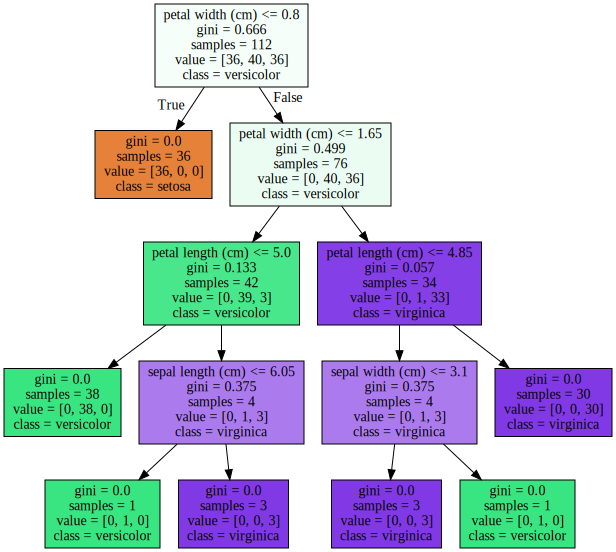

In [17]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf , "tree" , feature_names=iris_data.feature_names,class_names=iris_data.target_names,filled=True)
with open("./tree") as t:
  content = t.read()

graphviz.Source(content)